# Kernalisierte Stein Diskripanz. Anwendung
https://cran.r-project.org/web/packages/KSD/index.html

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
import warnings
warnings.filterwarnings('ignore')

**Im folgendem betrachten wir zunächst ein einfaches Anwendungsbeispiel. Wir testen die Genauigkeit unserer KSD-Methode, im vergleich zu klassischen Test. Hierbei betrachten wir eine gemischte Normalverteilung mit Dichte 
$$
q(x) = \frac{1}{5}\sum_{i = 1}^5 \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(x-\mu_i)^2}. 
$$
Für unsere Methode benötigen wir die Score Funktion von q
\begin{align}
s_q(x) &= \frac{d}{dx} log(\frac{1}{5}\sum_{i = 1}^5 \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}(x-\mu_i)^2}) \\
       &= \frac{d}{dx} log(\frac{1}{5} \frac{1}{\sqrt{2\pi}} ) + log(\sum_{i = 1}^5 e^{-\frac{1}{2}(x-\mu_i)^2})\\
       &= \frac{\sum_{i = 1}^5 -(x-\mu_i) e^{-\frac{1}{2}(x-\mu_i)^2}}{\sum_{i = 1}^5 e^{-\frac{1}{2}(x-\mu_i)^2}} \\
\end{align}**


**Für unseren Test ziehen wir mit gleicher Wahrscheinlichkeit entweder eine Stichpobe aus q oder aus q mit einem Fehler Term. Genaueres zum Test Verfahren unten. Hier folgen einige Funktionen zum sampeln und Score Funktionen.**

In [2]:

def sample_from_p(sample_size , mu):
    u = stats.uniform.rvs(size = sample_size)
    p_sample = np.zeros(sample_size)
    for i in range(sample_size):
        if u[i]< 0.2:
            p_sample[i] = stats.norm.rvs(loc = mu[0], scale = 1,size = 1)
        elif 0.2 <= u[i]< 0.4:
            p_sample[i] = stats.norm.rvs(loc = mu[1], scale = 1,size = 1) 
        elif 0.4 <= u[i]< 0.6:
            p_sample[i] = stats.norm.rvs(loc = mu[2], scale = 1,size = 1)
        elif 0.6 <= u[i]< 0.8:
            p_sample[i] = stats.norm.rvs(loc = mu[3], scale = 1,size = 1) 
        elif 0.8 <= u[i]:
            p_sample[i] = stats.norm.rvs(loc = mu[4], scale = 1,size = 1)
    return p_sample

def sample_from_p_with_error_in_mu(sample_size , mu, sig_per = 1):
    u = stats.uniform.rvs(size = sample_size)
    p_sample = np.zeros(sample_size)
    for i in range(sample_size):
        if u[i]< 0.2:
            p_sample[i] = stats.norm.rvs(loc = mu[0]+stats.norm.rvs(0,sig_per), scale = 1,size = 1)
        elif 0.2 <= u[i]< 0.4:
            p_sample[i] = stats.norm.rvs(loc = mu[1]+stats.norm.rvs(0,sig_per), scale = 1,size = 1) 
        elif 0.4 <= u[i]< 0.6:
            p_sample[i] = stats.norm.rvs(loc = mu[2]+stats.norm.rvs(0,sig_per), scale = 1,size = 1)
        elif 0.6 <= u[i]< 0.8:
            p_sample[i] = stats.norm.rvs(loc = mu[3]+stats.norm.rvs(0,sig_per), scale = 1,size = 1) 
        elif 0.8 <= u[i]:
            p_sample[i] = stats.norm.rvs(loc = mu[4]+stats.norm.rvs(0,sig_per), scale = 1,size = 1)
    return p_sample

def sample_from_p_with_error_in_sigma(sample_size , mu, sig_per = 1):
    u = stats.uniform.rvs(size = sample_size)
    p_sample = np.zeros(sample_size)
    for i in range(sample_size):
        if u[i]< 0.2:
            p_sample[i] = stats.norm.rvs(loc = mu[0], scale = abs(1+stats.norm.rvs(0,sig_per)),size = 1) #Achtung darf nicht negativ sein.
        elif 0.2 <= u[i]< 0.4:
            p_sample[i] = stats.norm.rvs(loc = mu[1], scale =  abs(1+stats.norm.rvs(0,sig_per)),size = 1) 
        elif 0.4 <= u[i]< 0.6:
            p_sample[i] = stats.norm.rvs(loc = mu[2], scale =  abs(1+stats.norm.rvs(0,sig_per)),size = 1)
        elif 0.6 <= u[i]< 0.8:
            p_sample[i] = stats.norm.rvs(loc = mu[3], scale =  abs(1+stats.norm.rvs(0,sig_per)),size = 1) 
        elif 0.8 <= u[i]:
            p_sample[i] = stats.norm.rvs(loc = mu[4], scale =  abs(1+stats.norm.rvs(0,sig_per)),size = 1)
    return p_sample
def sample_from_p_with_error_in_weights(sample_size , mu, sig_per = 1):
    u = stats.uniform.rvs(size = sample_size)
    p_sample = np.zeros(sample_size)
    for i in range(sample_size):
        if u[i]< 0.2+stats.norm.rvs(0,sig_per):
            p_sample[i] = stats.norm.rvs(loc = mu[0], scale = 1,size = 1) #Achtung darf nicht negativ sein.
        elif 0.2 <= u[i]< 0.4+stats.norm.rvs(0,sig_per):
            p_sample[i] = stats.norm.rvs(loc = mu[1], scale =  1,size = 1) 
        elif 0.4 <= u[i]< 0.6+stats.norm.rvs(0,sig_per):
            p_sample[i] = stats.norm.rvs(loc = mu[2], scale =  1,size = 1)
        elif 0.6 <= u[i]< 0.8+stats.norm.rvs(0,sig_per):
            p_sample[i] = stats.norm.rvs(loc = mu[3], scale =  1,size = 1) 
        elif 0.8 <= u[i]:
            p_sample[i] = stats.norm.rvs(loc = mu[4], scale =  1, size = 1)
    return p_sample

**Die Wahl des Kernels und die einhergehenden Paramter beeinflussen die Genauigkeit der KSD-Methode. Im folgendem Betrachten wird den RBF Kernel,
$$
k(x,x') = exp(-\frac{||x-x'||^2}{2\sigma^2}),
$$
welcher anschaulich die Ähnlichkeit zweier Punkte wiedergibt. Hier gilt es den Parameter $\sigma$ gut zu wählen. Dieser beeinflusst den Bereich, in dem wir zwei Punkte als ähnlich ansehen.** 

**Als Parameter $\sigma$ wählen wir bei weniger als 100 Datenpunkten die Mediane Distanz. Bei mehr als 100 Punkten ziehen wir zufällig 100 Punkte aus der Probe und berechnen genannte Distanz darauf.**

In [3]:

def find_median_distance(Z):
    size1 = np.shape(Z)[0]  
    if(size1 > 100):
        Zmed = Z[np.random.choice(size1,100)]
        size1 = 100
        
    else:
        Zmed = Z
    
    Zmed_later = Zmed
    Zmed = np.matrix(Zmed).T
    Zmedsq = np.multiply(Zmed,Zmed)
    
    G = Zmedsq
    Q = np.tile(G,(1,size1))
    R = np.tile(G,(1,size1)).T
    dists = Q + R - 2 * (Zmed @ Zmed.T)
    dists = dists - np.tril(dists)
    dists = np.asarray(dists)
    
    median_dist = np.median(dists[np.absolute(dists>0)])
    return median_dist

**Im folgendem Berechnen wir** $ \hat{\mathbb{S}}_u(p,q) $ **und**  $ \hat{\mathbb{S}}^*_u(p,q) $

In [4]:
def KSD(x,Sqx):
    h = np.sqrt(0.5 * find_median_distance(x))
    Sqx = np.matrix(Sqx(x)).T
    x = np.matrix(x).T
    XY = x @ x.T
    
    x2 = np.multiply(x,x)
    sumx = np.multiply(x,Sqx)

    X2e = np.tile(x2, (1,np.shape(x)[0]))
    H = (X2e + X2e.T - 2*XY)
    Kxy = np.exp(-H/(2*h**2))
    
    sqxdy = -(Sqx @ x.T - np.tile(sumx,(1,np.shape(x)[0])))/h**2
    dxsqy = sqxdy.T
    dxdy = (-H/h**4 + 1/h**2)
    M = np.multiply((Sqx @ Sqx.T + sqxdy + dxsqy + dxdy) , Kxy)
    u = M - np.diag(np.diag(M))
    ksd = np.sum(u)/(np.shape(x)[0]*(np.shape(x)[0]-1))
    return u,ksd 

def boot(nboot,n,u,ksd):
    bootstrapSamples = np.zeros(nboot)
    for i in range(nboot):
        wtsboot = (stats.multinomial.rvs(n,size=1,p=1/n * np.ones(n))/n).T
        bootstrapSamples[i] = (wtsboot.T-1/n)@u@(wtsboot-1/n)
    p = np.mean(bootstrapSamples >= ksd)
    return p   


**Um die verschiedenen Statistischen-Tests zu vergleichen wiederholen wir folgenden Test 1000 mal und berechnen die Fehlerrate:\
    Ziehe zufällige Erwartungswerte aus Uni([0,10])\
    Wähle mit Wahrscheinlichkeit 1/2 die Korrekte Verteilung oder die mit dem Fehler\
    Berechne anhand 1000 Bootstrapsamples den p-Wert\
    Entscheide ob der Test die Verteilung korrekt identifizieren konnte**
    

In [17]:
def test_KSD(sample_size, dist_error, sig_per = 1):
    error_rate = 0
    alpha = 0.05
    for i in range(100):
        alpha = 0.05
        mu = stats.uniform.rvs(0,10,5)
        s_q = lambda x : (-(x-mu[0])*stats.norm.pdf(x,loc = mu[0], scale = 1)+\
                        -(x-mu[1])*stats.norm.pdf(x,loc = mu[1], scale = 1)+\
                        -(x-mu[2])*stats.norm.pdf(x,loc = mu[2], scale = 1)+\
                        -(x-mu[3])*stats.norm.pdf(x,loc = mu[3], scale = 1)+\
                        -(x-mu[4])*stats.norm.pdf(x,loc = mu[4], scale = 1))/\
                        (stats.norm.pdf(x,loc = mu[0], scale = 1)+\
                        stats.norm.pdf(x,loc = mu[1], scale = 1)+\
                        stats.norm.pdf(x,loc = mu[2], scale = 1)+\
                        stats.norm.pdf(x,loc = mu[3], scale = 1)+\
                        stats.norm.pdf(x,loc = mu[4], scale = 1))
        
        # 0 Richtige Verteilung; 1 Falsche Verteilung
        d = random.choice([0,1])
        if d == 0:
            x = sample_from_p(sample_size,mu)
            u, ksd = KSD(x,s_q)
            p = boot(1000,sample_size,u,ksd)
            if p < alpha:
                error_rate = error_rate + 1
        else: 
            x = dist_error(sample_size,mu,sig_per)
            u,ksd = KSD(x,s_q)
            p = boot(1000,sample_size,u,ksd)
            if p > alpha:
                error_rate = error_rate + 1
    return error_rate/100

def test_other(sample_size, gof, dist_error, sig_per=1):
    # which_test == 0 -> With error in mu
    error_rate = 0
    for i in range(100):
        mu = stats.uniform.rvs(0,10,5)
        p_cdf  = lambda x : 1/5*stats.norm.cdf(x,loc = mu[0], scale = 1)+\
                    1/5*stats.norm.cdf(x,loc = mu[1], scale = 1)+\
                    1/5*stats.norm.cdf(x,loc = mu[2], scale = 1)+\
                    1/5*stats.norm.cdf(x,loc = mu[3], scale = 1)+\
                    1/5*stats.norm.cdf(x,loc = mu[4], scale = 1)
        
        d = random.choice([0,1])
        
        if d == 0:
            p = gof(sample_from_p(sample_size,mu),p_cdf).pvalue
            if p < 0.05: # Test Signifikant-> Vertielungen nicht gleich -> Falsch
                error_rate = error_rate + 1

        if d == 1:
            p = gof(dist_error(sample_size,mu,sig_per),p_cdf).pvalue
            if p > 0.05: 
                error_rate = error_rate + 1


    return error_rate/100

**Wir betrachten neben dem KSD-Test, denn Kolmogorov-Smirnov, Cramer van Mises,... .
Als fehlerhafte Verteilung betrachten wir die Verteilung von q, wobei wir einen Std-Nv Fehler auf den Erwartugswert, Varianz oder die Gewichte addieren. Anschließend betrachten wir den Test Erfolg bei fehlerhafte Verteilung mit unterschiedlich großer Varianz.**

1
2
3


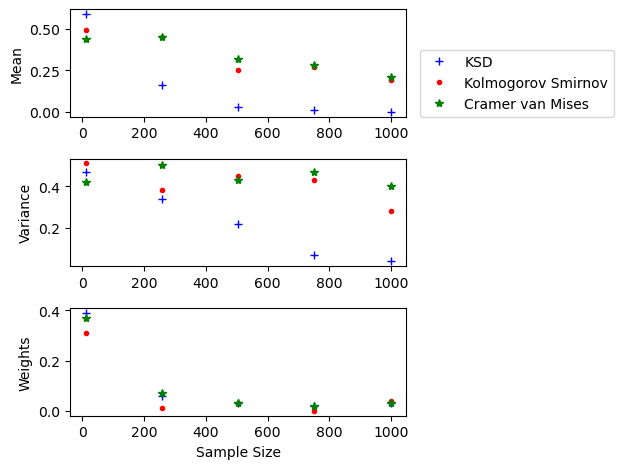

In [18]:
def plot_mean_size(axs):
    sample_sizes = np.linspace(10, 1000, 5, dtype=int)
    errors__mu_KSD = [test_KSD(sample_sizes[i],sample_from_p_with_error_in_mu) for i in range(len(sample_sizes))]
    print('1')
    errors__mu_KOL = [test_other(sample_sizes[i],stats.kstest,sample_from_p_with_error_in_mu) for i in range(len(sample_sizes))]
    errors__mu_CRA = [test_other(sample_sizes[i],stats.cramervonmises,sample_from_p_with_error_in_mu) for i in range(len(sample_sizes))]
    axs[0].plot(sample_sizes,errors__mu_KSD, 'b+',label = 'KSD')
    axs[0].plot(sample_sizes,errors__mu_KOL,'r.',label = 'Kolmogorov Smirnov')
    axs[0].plot(sample_sizes,errors__mu_CRA,'g*',label = 'Cramer van Mises')
def plot_variance_size(axs):
    sample_sizes = np.linspace(10, 1000, 5, dtype=int)
    errors__sig_KSD = [test_KSD(sample_sizes[i],sample_from_p_with_error_in_sigma) for i in range(len(sample_sizes))]
    print('2')
    errors__sig_KOL = [test_other(sample_sizes[i],stats.kstest,sample_from_p_with_error_in_sigma) for i in range(len(sample_sizes))]
    errors__sig_CRA = [test_other(sample_sizes[i],stats.cramervonmises,sample_from_p_with_error_in_sigma) for i in range(len(sample_sizes))]
    axs[1].plot(sample_sizes,errors__sig_KSD, 'b+')
    axs[1].plot(sample_sizes,errors__sig_KOL,'r.') 
    axs[1].plot(sample_sizes,errors__sig_CRA,'g*')
def plot_weights_size(axs):
    sample_sizes = np.linspace(10, 1000, 5, dtype=int)
    errors__wei_KSD = [test_KSD(sample_sizes[i],sample_from_p_with_error_in_weights) for i in range(len(sample_sizes))]
    print('3')
    errors__wei_KOL = [test_other(sample_sizes[i],stats.kstest,sample_from_p_with_error_in_weights) for i in range(len(sample_sizes))]
    errors__wei_CRA = [test_other(sample_sizes[i],stats.cramervonmises,sample_from_p_with_error_in_weights) for i in range(len(sample_sizes))]
    axs[2].plot(sample_sizes,errors__wei_KSD, 'b+')
    axs[2].plot(sample_sizes,errors__wei_KOL,'r.') 
    axs[2].plot(sample_sizes,errors__wei_CRA,'g*')
fig, axs = plt.subplots(3)

plot_mean_size(axs)
plot_variance_size(axs)
plot_weights_size(axs)
axs[2].set(xlabel='Sample Size', ylabel='Weights')
axs[1].set(ylabel='Variance')
axs[0].set(ylabel='Mean')
axs[0].legend(loc=(1.04, 0))
fig.tight_layout()
plt.savefig(fname = 'plot_ksd_test_1_2')


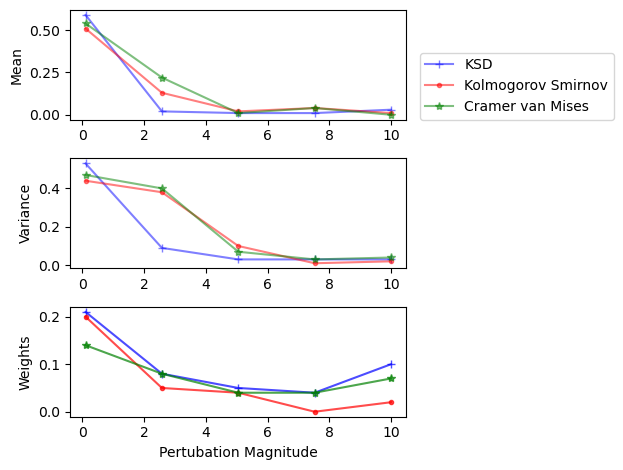

In [22]:
def plot_mean_pertubation(axs):
    sig_per = np.linspace(0.1, 10, 5)
    errors__mu_KSD = [test_KSD(100,sample_from_p_with_error_in_mu,sig_per[i]) for i in range(len(sig_per))]
    errors__mu_KOL = [test_other(100,stats.kstest,sample_from_p_with_error_in_mu,sig_per[i]) for i in range(len(sig_per))]
    errors__mu_CRA = [test_other(100,stats.cramervonmises,sample_from_p_with_error_in_mu,sig_per[i]) for i in range(len(sig_per))]
    axs[0].plot(sig_per,errors__mu_KSD, 'b+-', label = 'KSD', alpha = 0.5)
    axs[0].plot(sig_per,errors__mu_KOL,'r.-', label = 'Kolmogorov Smirnov', alpha = 0.5)
    axs[0].plot(sig_per,errors__mu_CRA,'g*-', label = 'Cramer van Mises', alpha = 0.5)
def plot_variance_pertubation(axs):
    sig_per = np.linspace(0.1, 10, 5)
    errors__sig_KSD = [test_KSD(100,sample_from_p_with_error_in_sigma,sig_per[i]) for i in range(len(sig_per))]
    errors__sig_KOL = [test_other(100,stats.kstest,sample_from_p_with_error_in_sigma,sig_per[i]) for i in range(len(sig_per))]
    errors__sig_CRA = [test_other(100,stats.cramervonmises,sample_from_p_with_error_in_sigma,sig_per[i]) for i in range(len(sig_per))]
    axs[1].plot(sig_per,errors__sig_KSD, 'b+-', alpha = 0.5)
    axs[1].plot(sig_per,errors__sig_KOL,'r.-', alpha = 0.5)
    axs[1].plot(sig_per,errors__sig_CRA,'g*-', alpha = 0.5)
def plot_weights_pertubation(axs):
    sig_per = np.linspace(0.1, 10, 5)
    errors__wei_KSD = [test_KSD(100,sample_from_p_with_error_in_weights,sig_per[i]) for i in range(len(sig_per))]
    errors__wei_KOL = [test_other(100,stats.kstest,sample_from_p_with_error_in_weights,sig_per[i]) for i in range(len(sig_per))]
    errors__wei_CRA = [test_other(100,stats.cramervonmises,sample_from_p_with_error_in_weights,sig_per[i]) for i in range(len(sig_per))]
    axs[2].plot(sig_per,errors__wei_KSD, 'b+-', alpha = 0.7)
    axs[2].plot(sig_per,errors__wei_KOL,'r.-', alpha = 0.7) 
    axs[2].plot(sig_per,errors__wei_CRA,'g*-', alpha = 0.7)
    
fig, axs = plt.subplots(3)
plot_mean_pertubation(axs)
plot_variance_pertubation(axs)
plot_weights_pertubation(axs)
axs[2].set(xlabel='Pertubation Magnitude', ylabel='Weights')
axs[1].set(ylabel='Variance')
axs[0].set(ylabel='Mean')
axs[0].legend(loc=(1.04, 0))
fig.tight_layout()
plt.savefig(fname = 'plot_ksd_test_1_3.pdf')


##### Fertig:
    Fehler Varianz
    Fehler in Gewichten
    Unterschiedliche Fehler Größen
    Andere Breitbande 
##### Als nächstes:
    
    Alles Erklären
    Plots
    Andere Kernels: (Matern mit verschiedenen Parametern nu)
    Andere Verteilung: (Gamma)
    Verteilung wo es Theoretisch nicht funktionieren sollte(Eigentlich NV und Cauchy)
    
##### Fragen:
    
    Welche anderen Tests?
    Komplexes Model? Welches? Wie?